In [1]:
import os
import sys
home_dir = "../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import math, random
import matplotlib.pyplot as plt
import seaborn as sns

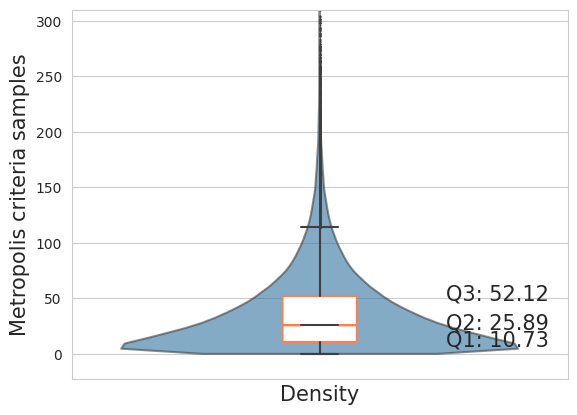

In [145]:
beta_div_one = 0.0000861733034*310 #beta_div_one *
# x = np.array([beta_div_one*math.log(random.random()) for i in range(130000)])
x = np.array([abs(math.log(random.random())) / (0.0000861733034*310) for i in range(130000)])

# mini, q1, median, q3, maxi = np.percentile(x, [0, 25, 50, 75, 100])
percentiles = np.percentile(x, [0, 25, 50, 75, 100])
iqr = percentiles[3] - percentiles[1]

# x.shape
ticks_labels_fontsize = 15

# sns.set_style('whitegrid')
# ax = sns.histplot(x, kde=True, cumulative=False,  line_kws={'ls':'--'}, alpha=0.6)
# ax.lines[0].set_color('crimson')

PROPS = {'boxprops':{'facecolor':'white', 'edgecolor':'coral', 'zorder': 2}, "notch":True}
ax = sns.boxplot(x, width=0.15, orient="v", fliersize=.5, showcaps=True, **PROPS)# flierprops={"marker": ""}) **PROPS
sns.violinplot(x, cut=0, orient="v", inner=None, ax=ax)
plt.setp(ax.collections, alpha=.6)
# plt.text(50, 2500, "Kernel density estimate (KDE)", color='crimson', size=ticks_labels_fontsize)
plt.ylim(top=310)

# plt.text(0.3, mini, f"{mini:.2f}")
for i,x in enumerate(percentiles[1:-1]):
    plt.text(0.255, x-4, f"Q{i+1}: {x:.2f}", fontsize=ticks_labels_fontsize)

plt.ylabel("Metropolis criteria samples", fontsize=ticks_labels_fontsize)
plt.xlabel("Density", fontsize=ticks_labels_fontsize)
plt.xticks([], fontsize=ticks_labels_fontsize)
# plt.xticks(fontsize=ticks_labels_fontsize, rotation=45, ha="right", rotation_mode='anchor')
# plt.yticks([])
plt.show()
# plt.savefig(home_dir+f"plots/metorpolis_criteria_box_violin.png", dpi=300, format="png", bbox_inches='tight', pad_inches=0.05)